In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [22]:
pixel_to_um = 0.1155
pixel_to_m = pixel_to_um * 1e-6

In [2]:
def bb_box_to_point(bb_box):
    # Get the midpoint of bb_box (x1, y1, x2, y2)
    x1 = bb_box[0]
    y1 = bb_box[1]
    x2 = bb_box[2]
    y2 = bb_box[3]
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2
    return x_mid, y_mid

def dist(x1, y1, x2, y2):
    # return (x2-x1)
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def get_files(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith(".txt"): 
            files.append(file)
    return files

In [3]:
# A set of bad data
bad_data = ['Set10a-0.txt',
 'Set10a-2.txt',
 'Set1a-0.txt',
 'Set1a-3.txt',
 'set1b-0.txt',
 'set1b-5.txt',
 'Set4a-1.txt',
 'set4b-2.txt',
 'set5b-3.txt',
 'Set6a-1.txt',
 'Set6a-2.txt',
 'Set7a-6.txt',
 'set7b-3.txt',
 'Set8a-2.txt',
 'set8b-2.txt',
 'Set3a-0.txt',
 'Set3a-1.txt',
 'Set7a-3.txt',]

# Plot Paths

In [4]:
FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot
t_array = []
r_array = []
x_array = []
y_array = []

for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        r_list = []
        t_list = []
        x_list = []
        y_list = []

        x0, y0 = -1, -1
        t0 = 0
        i = 0
        for line in lines:
            bb_box = [float(i) for i in line.split(",")[1:]]

            x_mid, y_mid = bb_box_to_point(bb_box)
            t = float(line.split(",")[0])
            if x0 == -1:
                x0, y0 = x_mid, y_mid

            t_list.append(i)
            r_list.append(dist(x0, y0, x_mid, y_mid))
            x_list.append(x_mid-x0)
            y_list.append(y_mid-y0)
            i += 1

        # Ignore stationary ones and the ones that exit the screen
        if(r_list[-1] == r_list[-2] == r_list[-3]) or max(r_list) > 150:
            print(f"Skipping {file}")
        else:
            t_array.append(t_list)
            r_array.append(r_list)
            x_array.append(x_list)
            y_array.append(y_list)

Text(0, 0.5, 'Distance from Origin')

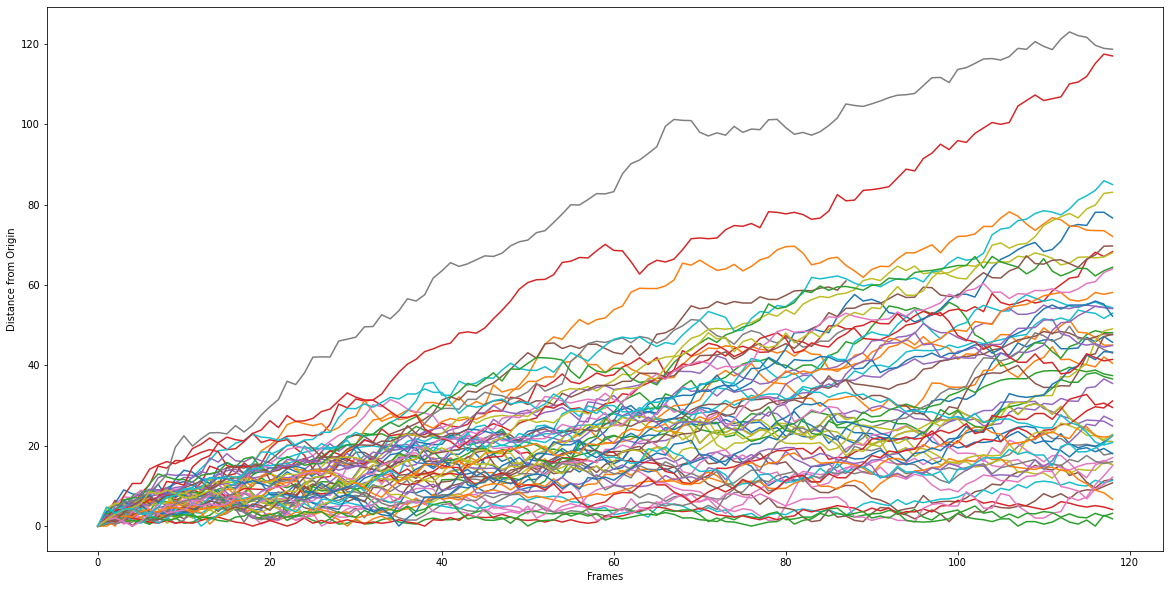

In [5]:
plt.figure(figsize=(20,10))

# Plot t_array and r_array
for i in range(len(t_array)):
    plt.plot(t_array[i], r_array[i], label=file_list[i])

plt.xlabel("Frames")
plt.ylabel("Distance from Origin")

Text(0, 0.5, 'y')

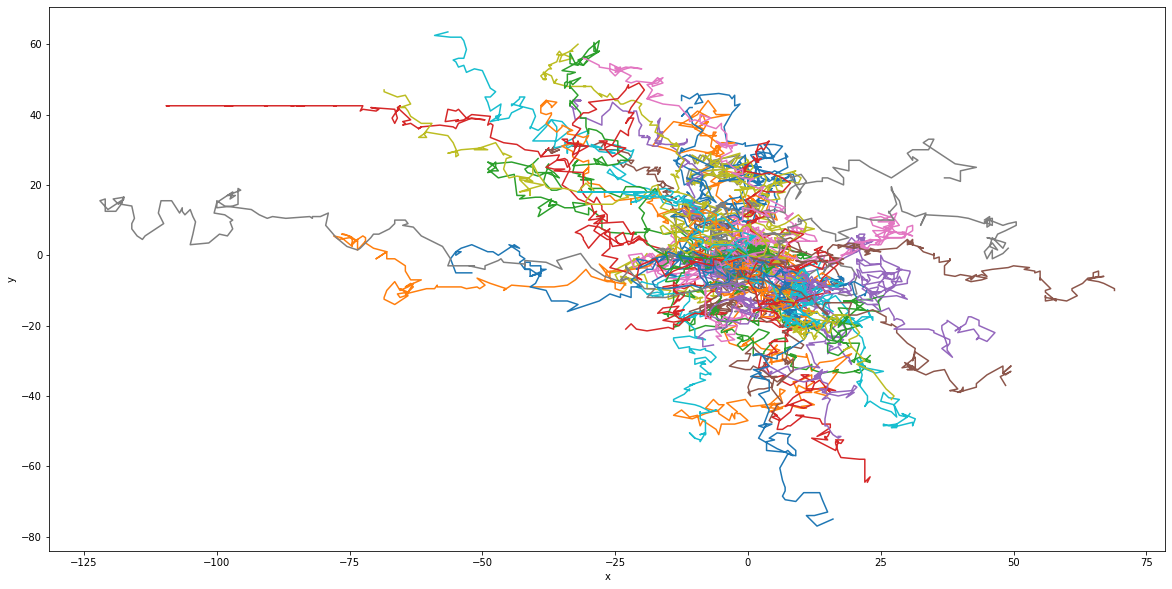

In [6]:
plt.figure(figsize=(20,10))

# Plot x_array and y_array
for i in range(len(x_array)):
    plt.plot(x_array[i], y_array[i], label=file_list[i])

plt.xlabel("x")
plt.ylabel("y")

In [7]:
%matplotlib widget # Will require pip install ipympl

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot t_array against x_array and y_array in a 3d plot
for i in range(len(t_array)):
    ax.plot(t_array[i], x_array[i], y_array[i], label=file_list[i])

ax.set_xlabel('Frames')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show() 

UsageError: unrecognized arguments: # Will require pip install ipympl


# Make Histogram

In [26]:
step_sizes = []

FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot

for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = [float(i) for i in line.split(",")[1:]]

            x_mid, y_mid = bb_box_to_point(bb_box)
            x_mid *= pixel_to_m
            y_mid *= pixel_to_m

            if i > 0:
                step_sizes.append(dist(x0, y0, x_mid, y_mid))
            x0, y0 = x_mid, y_mid
            i += 1

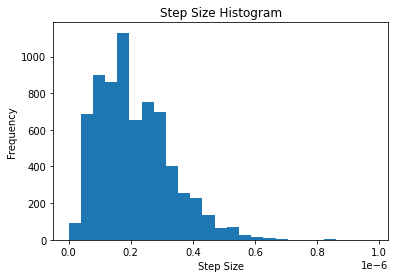

In [27]:
# Histogram of step sizes
plt.figure()
plt.hist(step_sizes, bins=25)
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.show()

In [48]:
# Get frequency of each step size with bin=25
step_sizes_hist = np.histogram(step_sizes, bins=25)
step_size, freq = step_sizes_hist[1][:-1], step_sizes_hist[0]
freq = freq

In [57]:
def f(x, a, b):
    return x/b * np.exp(-x**2/(2*a))

In [63]:
# Fit f(x) to step_size, freq
popt, pcov = curve_fit(f, step_size, freq)

C:\Users\QiLin\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


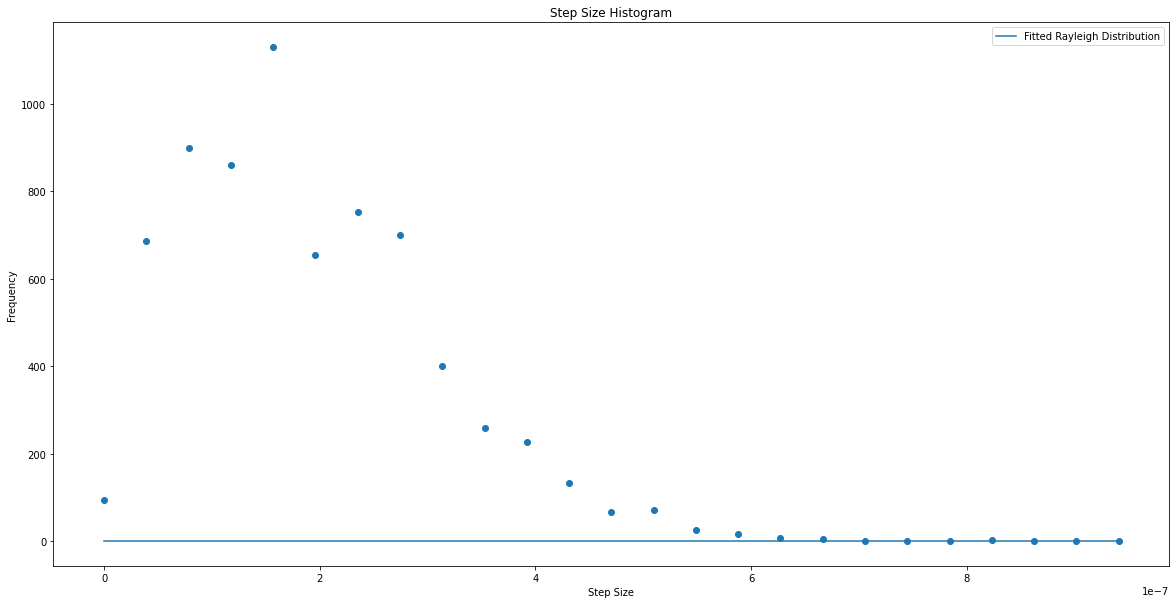

In [62]:
# Plot fitted curve against histogram
plt.figure(figsize=(20,10))
# plt.hist(step_sizes, bins=25, label="Histogram")
plt.scatter(step_size, freq)
plt.plot(step_size, f(step_size, *popt), label="Fitted Rayleigh Distribution")
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.legend()
plt.show()

In [60]:
popt

array([1., 1.])

In [21]:
step_size[1]-step_size[0]

0.3394112549695428